# PJ01: Class Experiment

In [46]:
__author__ = "730411065"

%reload_ext autoreload
%autoreload 2

DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## Question:
If students spend more time interacting with digital technology for work/school use, do they spend less time interacting with digital technology for personal usage?


## Hypothesis: 
I think that the more hours students use interacting with digital technology for work/school purposes, the less time they spend for personal use, and vice versa.

### Step 1:
Make the data into a list[dict].

In [47]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

print(f"{len(data_rows)} responses")
print(f"{len(data_rows[0].keys())} columns")

573 responses
36 columns


### Step 2:
Make into columnar so that we can make table to see just the top few responses. Then we will see the first two rows:

In [48]:
from data_utils import columnar
from data_utils import head
from data_utils import select
from tabulate import tabulate

data_cols: dict[str, list[str]] = columnar(data_rows)
selected_data: dict[str, list[str]] = select(data_cols, ["hours_online_work", "hours_online_social"])

tabulate(head(selected_data, 3), selected_data.keys(), "html")

hours_online_social,hours_online_work
3 to 5 hours,3 to 5 hours
5 to 10 hours,5 to 10 hours
3 to 5 hours,5 to 10 hours


### Step 3:
Make the `hours_online_social` and `hours_online_work` into its specific columns.

In [74]:
from data_utils import column_values

work_hours: list[str] = column_values(data_rows, "hours_online_work")
play_hours: list[str] = column_values(data_rows, "hours_online_social")


### Step 4:
Because our question is asking if spending more hours online for work affects the hours students spend online for socializing, we will compare the total number of peoeple in a set parameter of work hours (which I will set as less than 5 (<5) hours or more than 5 (>5) hours) to the corresponding times they spend socializing online.

Therefore, I print out the number of people who gave a response (the pool of data) and then print out how many of those people spends >5 hours online for work.

In [82]:
from data_utils import count
from data_utils import count_up
from data_utils import count_down

print(f"Number of people who answered for 'hours_online_work': {len(work_hours)}")
print(f"Number of people that picked an option of 'hours_online_work' more than 5 hours: {count_up(work_hours)}")
# print(f"Number of people that picked each option of how many hours online spent on work/school: {count(work_hours)}")


Number of people who answered for 'hours_online_work': 573
Number of people that picked an option of 'hours_online_work' more than 5 hours: 285


Knowing this, we can then move on to see how many students in the number of people who spend >5 hours online for work also spend <5 hours online for socializing.

To do this, I have made a function `up_indexed` that I use to filter through `work_hours` to make a list of the indices in which the values were above 5 hours (so `5-10 hours`, `1-+ hours`). Then I use another function called `specified_hours` to use that list of indices filtered from the `work_hours` list and applying that to the `play_hours` list to make a new list of the social hours options that corresponded to the filtered work hours. 

Simplified, this was the long way around to access the corresponding social hours that students who spends >5 hours chose.

In [81]:
from data_utils import down_indexed
from data_utils import up_indexed
from data_utils import specified_hours
from data_utils import count_down
from data_utils import count_up

up_work_index_list: list = up_indexed(work_hours)
list_of_up_specific_social_hours: list = specified_hours(play_hours, up_work_index_list)

print(f"Number of people who was on online for <5 hours for social purposes given that they were online for >5 for work purposes: {count_down(list_of_up_specific_social_hours)}")
print(f"Number of people who was on online for >5 hours for social purpose given that they were online for >5 for work purposes: {count_up(list_of_up_specific_social_hours)}")


Number of people who was on online for <5 hours for social purposes given that they were online for >5 for work purposes: 214
Number of people who was on online for >5 hours for social purpose given that they were online for >5 for work purposes: 71


### Step 5:
We have gotten all our information:


total number of people who responded: 573

out of 573, people who spend more than 5 hours for work: 285


out of 285, people who spend less than 5 hours for social: 214


out of 285, people who spend more than 5 hours for social: 71


Now that we know the numbers, let's make some visuals to see it better.

<AxesSubplot:>

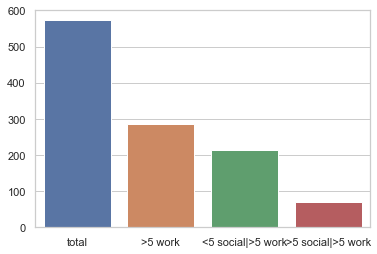

In [85]:
import seaborn

seaborn.barplot(x=["total", ">5 work", "<5 social|>5 work", ">5 social|>5 work"], y=[573, 285, 214,71])


From this visual and the numbers, we can see that there is a much higher percentage of people who spend less than 5 hours online for social purposes given that there are  than those who still spend more than 5 hours online for social purposes.

## Conclusion:

Therefore, my hypothesis was correct. The people who spend more than 5 hours online for work mostly spend less than 5 hours online for social purposes.

## Extra:
The bottom code goes through the same process but with those who spend less than 5 hours on work hours.

Number of people who answered for 'hours_online_work': 573
Number of people that picked an option of 'hours_online_work' less than 5 hours: 282
Number of people who was on online for <5 hours for social purposes given that they were online for <5 for work purposes: 213
Number of people who was on online for >5 hours for social purpose given that they were online for <5 for work purposes: 69


<AxesSubplot:>

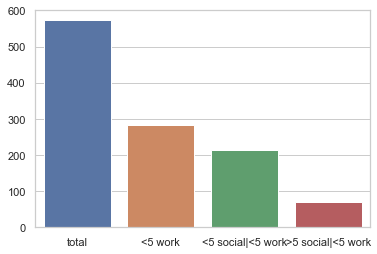

In [87]:
# opposite
from data_utils import count
from data_utils import count_up
from data_utils import count_down
from data_utils import down_indexed
from data_utils import up_indexed
from data_utils import specified_hours

print(f"Number of people who answered for 'hours_online_work': {len(work_hours)}")
print(f"Number of people that picked an option of 'hours_online_work' less than 5 hours: {count_down(work_hours)}")
# print(f"Number of people that picked each option of how many hours online spent on work/school: {count(work_hours)}")

down_work_index_list: list = down_indexed(work_hours)
list_of_down_specific_social_hours: list = specified_hours(play_hours, down_work_index_list)
# print(list_of_specified_social_hours)

print(f"Number of people who was on online for <5 hours for social purposes given that they were online for <5 for work purposes: {count_down(list_of_down_specific_social_hours)}")
print(f"Number of people who was on online for >5 hours for social purpose given that they were online for <5 for work purposes: {count_up(list_of_down_specific_social_hours)}")

import seaborn

seaborn.barplot(x=["total", "<5 work", "<5 social|<5 work", ">5 social|<5 work"], y=[573, 282, 213,69])


From the extra work, we can conclude that students who spend less than 5 hours online for work mostly also spend less than 5 hours online for socializing. 
This somewhat contradicts the logic of the conclusion I got from the pool of students who spent more than 5 hours online for work. Hmmmmmmm